In [1]:
from imports import *

2023-01-05 15:48:11.322252: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import data_management
from data_management import load_stack
from data_management import load_data

import interactive_plot

import metrics
from metrics import statistics
from metrics import confusion_matrix
from metrics import error_distribution
from metrics import error_borders
from metrics import PR_curve

import generator_extended

import unet
from unet import load_model_unet
from unet import predict_net
from unet import get_unet
from unet import train
from unet import execute_predict

In [4]:

DATAPATH = '/raid/mpsych/CACTAS/DATA/Nathan Arnett Calcification/'
images_file = os.path.join(DATAPATH, 'images.npy')
labels_file = os.path.join(DATAPATH, 'labels.npy')

In [5]:
images = np.load(images_file)
labels = np.load(labels_file)

In [6]:
model = get_unet(0.0005, 512, 512, dr_rate=0.2, diceloss=False, jaccardloss=False, 
                 focalloss=False, customloss=False, start_filters=16)

start_filters 16


2023-01-05 15:48:30.618120: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-01-05 15:48:30.865400: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-01-05 15:48:30.865445: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-01-05 15:48:30.875310: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-01-05 15:48:30.875347: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2023-01-05 15:48:30.877712: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcufft.so.10
2

conv1 shape: (None, 512, 512, 16)
conv1 shape: (None, 512, 512, 16)
pool1 shape: (None, 256, 256, 16)
conv2 shape: (None, 256, 256, 32)
conv2 shape: (None, 256, 256, 32)
pool2 shape: (None, 128, 128, 32)
conv3 shape: (None, 128, 128, 64)
conv3 shape: (None, 128, 128, 64)
pool3 shape: (None, 64, 64, 64)


2023-01-05 15:48:30.895433: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-05 15:48:30.899890: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-01-05 15:48:30.908311: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0
2023-01-05 15:48:30.908342: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-01-05 15:48:31.481618: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect StreamExecuto

In [7]:
gpu_available = tf.test.is_gpu_available()


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2023-01-05 15:48:34.882325: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-01-05 15:48:34.885182: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0
2023-01-05 15:48:34.885215: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect StreamExecutor with strength 1 edge matrix:
2023-01-05 15:48:34.885220: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1264]      0 
2023-01-05 15:48:34.885224: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1277] 0:   N 
2023-01-05 15:48:34.888093: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1418] Created TensorFlow device (/device:GPU:0 with 38425 MB memory) -> physical GPU (device: 0, name: A100-SXM4-40GB, pci bus id: 0000:47:00.0, compute capability: 8.0)


In [8]:
gpu_available

True

In [9]:
images = images.reshape(images.shape[0],512,512,1)
labels = labels.reshape(labels.shape[0],512,512,1)

In [10]:
p = np.random.permutation(len(images))

In [11]:
images = images[p]
labels = labels[p]

In [12]:
labels = labels.astype(np.float)

In [13]:
images = images.astype(np.float)
images /= images.max()

In [14]:
imgs_train = images[0:450]
imgs_mask_train = labels[0:450]
imgs_test = images[450:]
imgs_mask_test = labels[450:]

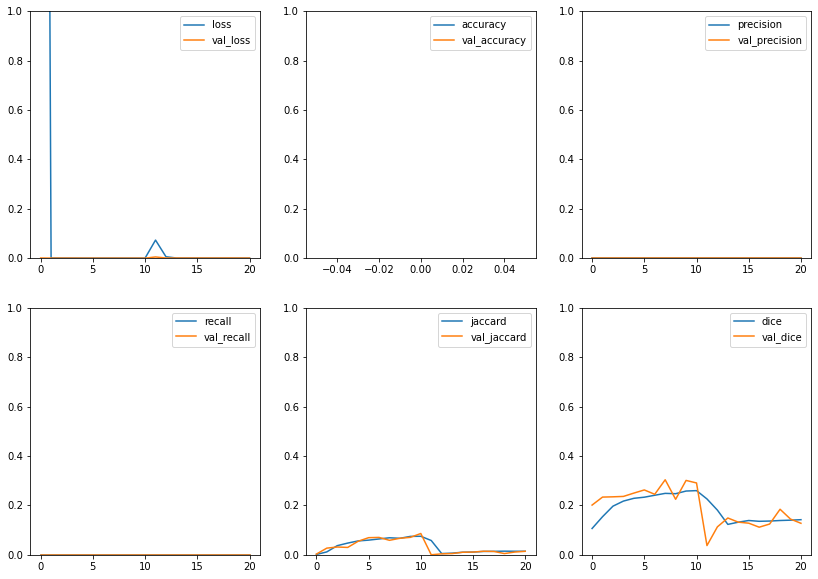

iteration 21
loss 0.0010498373303562403 loss_val 0.0009888397762551904
acc None acc_val None
prec 0.0 prec_val 0.0
rec 0.0 rec_val 0.0
jaccard 0.014291035942733288 jaccard_val 0.014182540588080883
dice 0.14210118353366852 dice_val 0.12755200266838074
time per epoch: 72.36385496457417
Epoch 22/1000
  5/100 [>.............................] - ETA: 57s - loss: 0.0010 - accuracy: 0.9998 - keras_precision: 0.0000e+00 - keras_recall: 0.0000e+00 - keras_jaccard_coef: 0.0142 - keras_dice_coef: 0.1437
Epoch 00022: saving model to /tmp/models/A100test/weights.22-0.00.hdf5
 10/100 [==>...........................] - ETA: 57s - loss: 0.0010 - accuracy: 0.9998 - keras_precision: 0.0000e+00 - keras_recall: 0.0000e+00 - keras_jaccard_coef: 0.0143 - keras_dice_coef: 0.1436batch 10 of 100 ...

Epoch 00022: saving model to /tmp/models/A100test/weights.22-0.00.hdf5
 15/100 [===>..........................] - ETA: 53s - loss: 0.0010 - accuracy: 0.9998 - keras_precision: 0.0000e+00 - keras_recall: 0.0000e+00 

In [ ]:
train(model, imgs_train, imgs_mask_train, imgs_test, imgs_mask_test,
      '/tmp/models/A100test', 50, 1000, verbosity=1, 
      perform_flipping=True, perform_rotation=True, to_dir=False, train_on_borders=False)


### Evaluate

In [12]:
pred = execute_predict(model, imgs_test, stepsize=512, resize_shortest=True, extensive=False)

In [ ]:
np.save('predictions.npy', pred)

In [13]:
cmatrix = confusion_matrix(pred, imgs_mask_test)

In [14]:
statistics(cmatrix)

{'jaccard_foreground': 0.0,
 'jaccard_background': 0.9996920171773659,
 'voc_score': 0.49984600858868294,
 'accuracy': 0.9996920171773659,
 'precision': nan,
 'recall': 0.0}

In [ ]:
error_distribution(model, imgs_test, imgs_mask_test, extensive=True, figsize=(15,10))

In [ ]:
PR_curve(pred, imgs_mask_test)

### Results On Single Image

In [ ]:
use_train = False
imgnr = 60
input_img = cv2.imread('/n/regal/pfister_lab/vincent/vcasser/connectomics/movements/epfl-' + ('train' if use_train else 'test') + '-crop/' + str(imgnr) + '.png',0) 
gt = misc.imread('/n/regal/pfister_lab/vincent/vcasser/connectomics/movements/epfl-' + ('train' if use_train else 'test') + '-crop-mask/' + str(imgnr) + '.png')
print(gt.shape)

plt.figure(figsize = (15,15))
plt.imshow(input_img, cmap='gray')

print(input_img.shape)
res = execute_predict(model, input_img.reshape(1,512,512,1).astype(float)/255.)
print(res.min(), res.max())

res[res>0.5]=1
res[res<=0.5]=0

plt.figure(figsize = (15,15))
plt.imshow(res[0,:,:,0], cmap='gray')

plt.figure(figsize = (15,15))
plt.imshow(gt[:,:,0], cmap='gray')

cv2.imwrite('example_img_gt.png', gt)
cv2.imwrite('example_img_raw.png', input_img)
cv2.imwrite('example_img.png', res[0,:,:,0]*255.)